In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

##### Load the dataset in pandas dataframe

In [2]:
df = pd.read_csv("Data.csv")
df.sample(5)

,area,bedrooms,price
8,1310,3,50
17,1540,3,60
7,3300,4,155
6,2732,4,135
18,2770,3,120


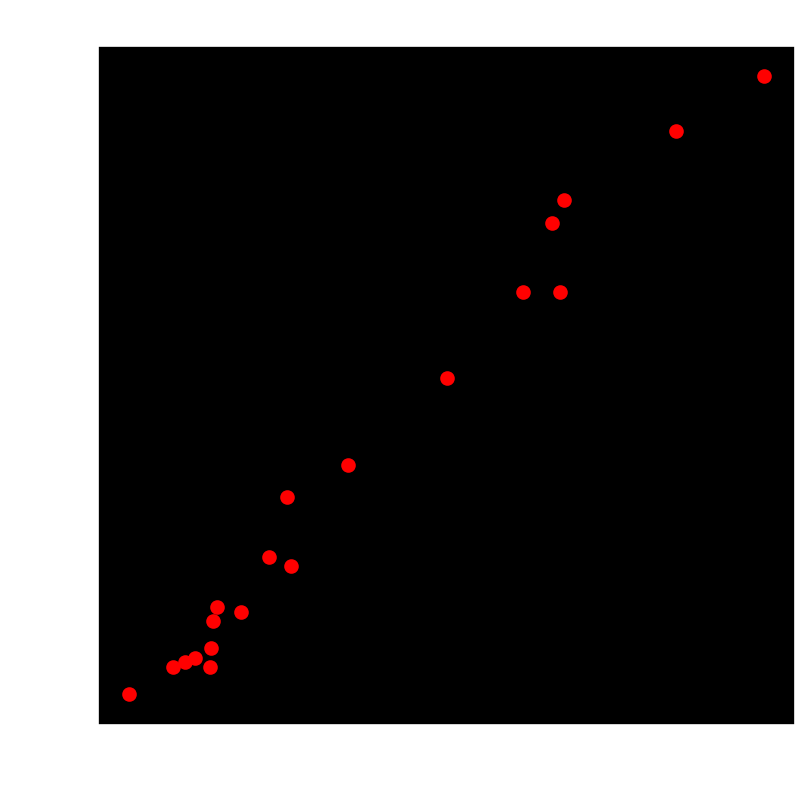

In [3]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
area = df["area"]
price = df["price"]
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.scatter(area, price, c="red", marker="o")
plt.savefig("Images/area_vs_price.png", bbox_inches="tight")

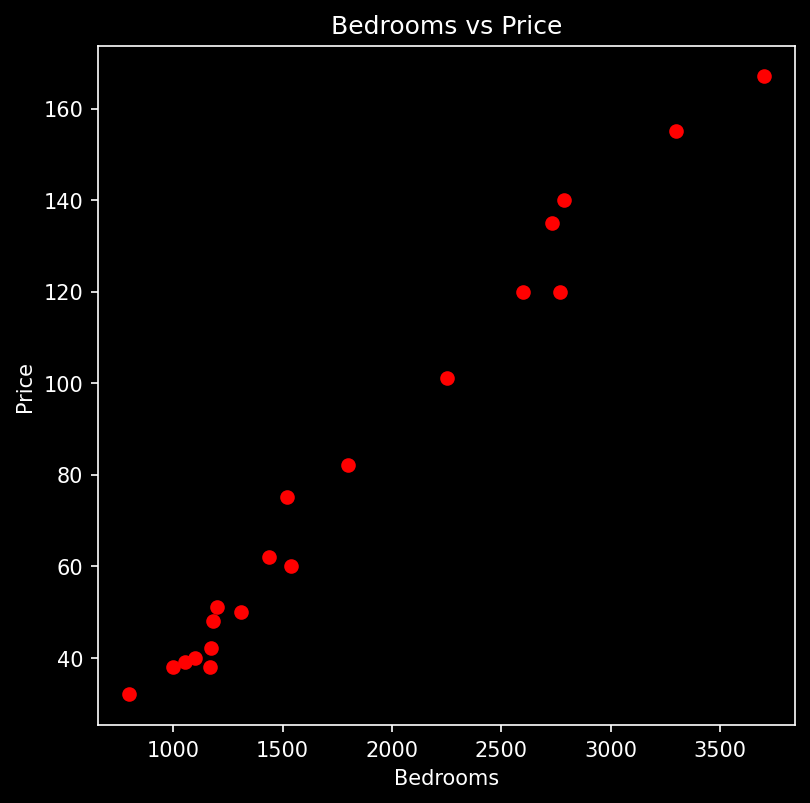

In [4]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
bedrooms = df["bedrooms"]
price = df["price"]
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs Price")
plt.scatter(area, price, c="red", marker="o")
plt.savefig("Images/bedrooms_vs_price.png", bbox_inches="tight")

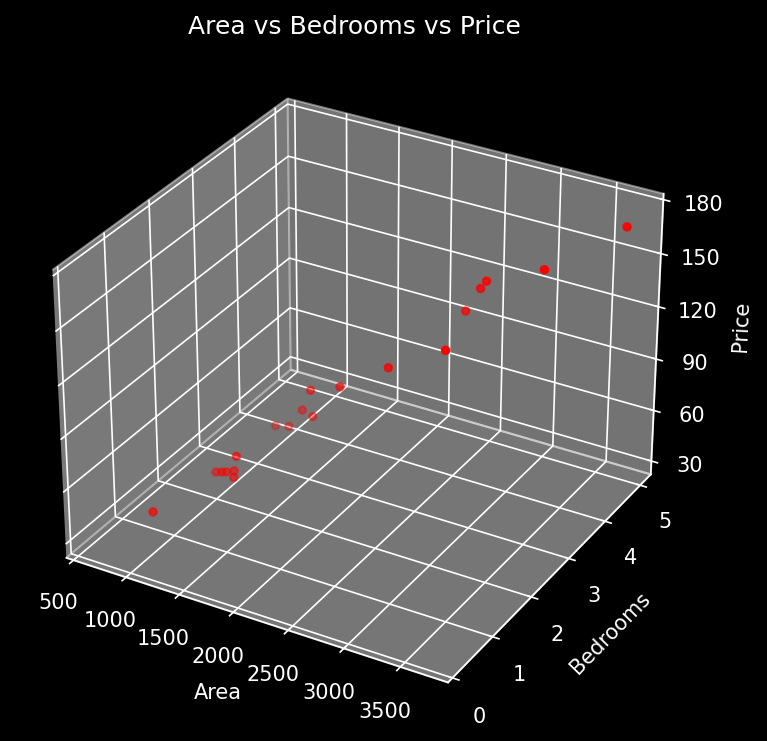

In [5]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
ax = plt.axes(projection="3d")
ax.scatter3D(area, bedrooms, price, color="red", marker=".", s=50)
ax.set_xticks(np.arange(500, 4000, 500))
ax.set_yticks(np.arange(0, 6, 1))
ax.set_zticks(np.arange(30, 200, 30))
ax.set_xlabel("Area")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("Area vs Bedrooms vs Price")
plt.savefig("Images/area_vs_bedrooms_vs_price.png", bbox_inches="tight")

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [9]:
def mini_batch_gradient_descent(x, y_true, epochs = 1000, batch_size = 5, learning_rate = 0.01):
    number_of_features = x.shape[1] # our case number_of_features = 2 (area, bedroom)
    w = np.ones(number_of_features) # initialize weights to 1
    b = 0 # initialize bias to 0
    total_samples = x.shape[0] # number of rows in x
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
    cost_list = []
    epoch_list = []
    for epoch in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = x[random_indices]
        y_tmp = y_true[random_indices]
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = w @ Xj.T + b
            error = yj - y_predicted
            w_grad = -(2/batch_size)*(error @ Xj)
            b_grad = -(2/batch_size)*np.sum(error)
            w -= learning_rate * w_grad
            b -= learning_rate * b_grad
            cost = np.sum(error**2)/batch_size
        if epoch%50==0:
            cost_list.append(cost)
            epoch_list.append(epoch)
    return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_X,y)
w, b, cost

(array([40.69058006,  2.53971088]), 79.75519874105306, 51.68481019433534)

###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

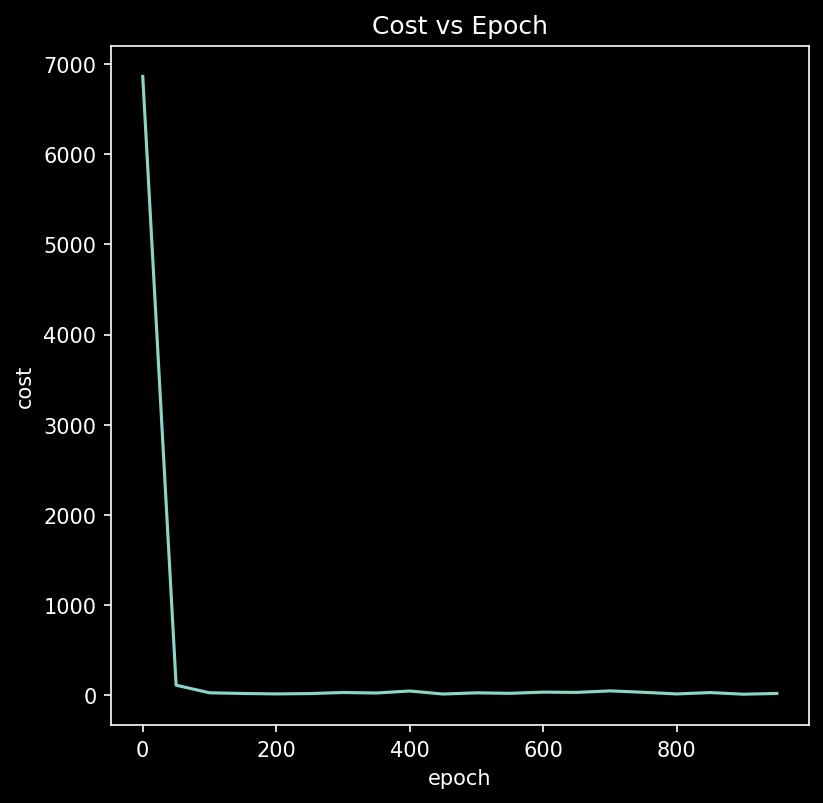

In [10]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Cost vs Epoch")
plt.plot(epoch_list,cost_list)
plt.savefig("Images/cost_vs_epoch_MBGD.png", bbox_inches="tight")

###### Lets do some predictions now. 

In [11]:
def predict(x):
    scaled_x = scaler.fit_transform(x)
    y_pred = w @ scaled_x.T + b
    return y_pred

In [12]:
predict(X)

array([ 40.37284886, 120.30849491,  61.60623519,  65.51729027,
        47.32583568,  45.87729676, 126.68206616, 154.10773638,
        55.3292332 , 176.1136768 ,  78.98870223, 129.24115159,
        37.66890954,  42.49737261, 100.71678603,  46.11871991,
        49.05223121,  66.43469825, 125.82479398,  25.31989526])